In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_img(path):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

def mutual_information(image1, image2, bins=256):
    # Calculate the histogram of the images, 这个hist_2d对应的z值是(intensity_1(image1的), intensity_2(image2的))对应出现的频率
    hist_2d, _, _ = np.histogram2d(image1.ravel(), image2.ravel(), bins=bins)

    # Calculate the joint probability distribution
    pxy = hist_2d / float(np.sum(hist_2d))
    px = np.sum(pxy, axis=1) # Marginal for x over y
    py = np.sum(pxy, axis=0) # Marginal for y over x

    # Calculate the mutual information
    px_py = px[:, None] * py[None, :]
    nzs = pxy > 0 # Non-zero joint probabilities
    mi = np.sum(pxy[nzs] * np.log(pxy[nzs] / px_py[nzs]))

    return mi

def caculate_hist_entropy(hist):
    p = hist / hist.sum()
    p = p[p > 0] # 移除概率为0的项
    return -np.sum(p * np.log2(p))

# 计算图片的熵
def caculate_entropy(image):
    hist = np.histogram(image, 256)[0]
    return caculate_hist_entropy(hist)

def caculate_joint_entropy(img1, img2):
    hist_2d, _, _ = np.histogram2d(img1.ravel(), img2.ravel(), bins=256)
    return caculate_hist_entropy(hist_2d)

def normalized_mutual_information(image1, image2, bins=256):
    """计算归一化互信息（NMI）。"""
    h1_entropy = caculate_entropy(image1)
    h2_entropy = caculate_entropy(image2)

    # 计算联合熵
    h12_entropy = caculate_joint_entropy(image1, image2)

    # 计算 NMI
    nmi = (h1_entropy + h2_entropy) / h12_entropy
    return 2 - (2 / nmi)


h_ct: 7.962960481410587
h_bse: 6.45861667574941
h_ct_masked: 2.9084022323003578
h_bse_masked: 2.3217249653377623
h_unreg_masked: 2.7966724951072486
h_joint_ct_bse_masked: 4.2180988512929165
h_joint_unreg_bse_masked: 4.0937971978367385
mi_ct_bse: 0.3753551060496648
mi_original_bse_unreg: 0.29999710018468223
mi_masked_ct_bse: 0.7014845949159224
mi_original_ct_mask_bse: 0.24697992134926453
mi_original_bse_mask_ct: 0.5262286513497495
mi_masked_unreg_bse: 0.7101987832279042
nmi_ct_bse: 0.07509899148601074
nmi_original_bse_unreg: 0.06371682246840593
nmi_masked_ct_bse: 0.38699951572964686
nmi_original_ct_mask_bse: 0.06929073515658835
nmi_original_bse_mask_ct: 0.16209798936640252
nmi_masked_unreg_bse: 0.400359788596484


(<Axes: title={'center': 'unreg_with_masked'}>,
 Text(0.5, 1.0, 'unreg_with_masked'))

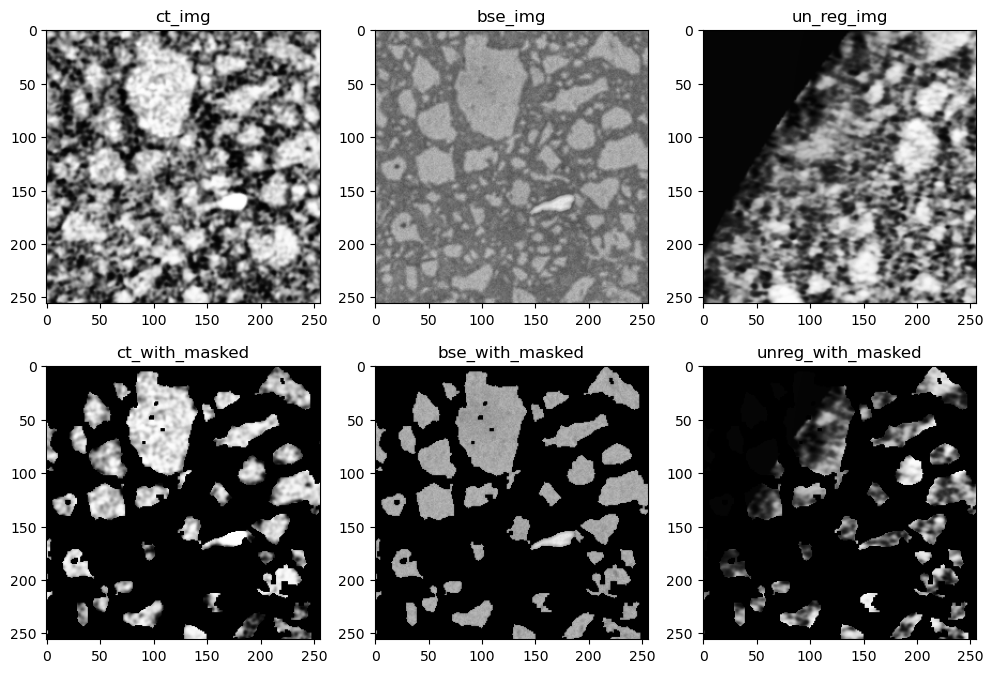

In [6]:

debug_ct_path = "D:/workspace/ml-workspace/registration/datasets/sample4/bse/s1/100/iter29_best_reg.bmp"
debug_bse_path = "D:/workspace/ml-workspace/registration/datasets/sample4/bse/s1/100/4-1-1-matched-bse.bmp"
debug_mask_path = "D:/workspace/ml-workspace/registration/datasets/sample4/bse/s1/100/4-1-1-matched-masked.bmp"
unreg_ct_path = "D:/workspace/ml-workspace/registration/datasets/sample4/bse/s1/100/slice_enhanced_32.bmp"

start_x, start_y = 110, 340
width, height = 256, 256

ct_img = load_img(debug_ct_path)
bse_img = load_img(debug_bse_path)
mask_img = load_img(debug_mask_path)
un_reg_img_big = load_img(unreg_ct_path)

un_reg_img = un_reg_img_big[start_y:start_y+height, start_x:start_x+width]

ct_with_masked = ct_img & mask_img
bse_with_masked = bse_img & mask_img
unreg_with_masked = un_reg_img & mask_img

h_ct = caculate_entropy(ct_img)
h_bse = caculate_entropy(bse_img)

h_ct_masked = caculate_entropy(ct_with_masked)
h_bse_masked = caculate_entropy(bse_with_masked)

h_unreg_masked = caculate_entropy(unreg_with_masked)

h_joint_ct_bse_masked = caculate_joint_entropy(ct_with_masked, bse_with_masked)
h_joint_unreg_bse_masked = caculate_joint_entropy(unreg_with_masked, bse_with_masked)

mi_ct_bse = mutual_information(ct_img, bse_img)
mi_original_bse_unreg = mutual_information(un_reg_img, bse_img)
mi_masked_ct_bse = mutual_information(ct_with_masked, bse_with_masked)
mi_original_ct_mask_bse = mutual_information(ct_img, bse_with_masked)
mi_original_bse_mask_ct = mutual_information(ct_with_masked, bse_img)
mi_masked_unreg_bse = mutual_information(unreg_with_masked, bse_with_masked)

nmi_ct_bse = normalized_mutual_information(ct_img, bse_img)
nmi_original_bse_unreg = normalized_mutual_information(un_reg_img, bse_img)
nmi_masked_ct_bse = normalized_mutual_information(ct_with_masked, bse_with_masked)
nmi_original_ct_mask_bse = normalized_mutual_information(ct_img, bse_with_masked)
nmi_original_bse_mask_ct = normalized_mutual_information(ct_with_masked, bse_img)
nmi_masked_unreg_bse = normalized_mutual_information(unreg_with_masked, bse_with_masked)


print(f"h_ct: {h_ct}")
print(f"h_bse: {h_bse}")

print(f"h_ct_masked: {h_ct_masked}")
print(f"h_bse_masked: {h_bse_masked}")
print(f"h_unreg_masked: {h_unreg_masked}")

print(f"h_joint_ct_bse_masked: {h_joint_ct_bse_masked}")
print(f"h_joint_unreg_bse_masked: {h_joint_unreg_bse_masked}")

print(f"mi_ct_bse: {mi_ct_bse}")
print(f"mi_original_bse_unreg: {mi_original_bse_unreg}")
print(f"mi_masked_ct_bse: {mi_masked_ct_bse}")
print(f"mi_original_ct_mask_bse: {mi_original_ct_mask_bse}")
print(f"mi_original_bse_mask_ct: {mi_original_bse_mask_ct}")
print(f"mi_masked_unreg_bse: {mi_masked_unreg_bse}")

print(f"nmi_ct_bse: {nmi_ct_bse}")
print(f"nmi_original_bse_unreg: {nmi_original_bse_unreg}")
print(f"nmi_masked_ct_bse: {nmi_masked_ct_bse}")
print(f"nmi_original_ct_mask_bse: {nmi_original_ct_mask_bse}")
print(f"nmi_original_bse_mask_ct: {nmi_original_bse_mask_ct}")
print(f"nmi_masked_unreg_bse: {nmi_masked_unreg_bse}")


rows, colums = 2, 3
plt.figure(figsize=(12, 8))
plt.subplot(rows, colums, 1), plt.imshow(ct_img, cmap='gray',vmin=0, vmax=255), plt.title('ct_img')
plt.subplot(rows, colums, 2), plt.imshow(bse_img, cmap='gray',vmin=0, vmax=255), plt.title('bse_img')
plt.subplot(rows, colums, 4), plt.imshow(ct_with_masked, cmap='gray',vmin=0, vmax=255), plt.title('ct_with_masked')
plt.subplot(rows, colums, 5), plt.imshow(bse_with_masked, cmap='gray',vmin=0, vmax=255), plt.title('bse_with_masked')
plt.subplot(rows, colums, 3), plt.imshow(un_reg_img, cmap='gray',vmin=0, vmax=255), plt.title('un_reg_img')
plt.subplot(rows, colums, 6), plt.imshow(unreg_with_masked, cmap='gray',vmin=0, vmax=255), plt.title('unreg_with_masked')

